In [1]:
import nbimporter
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

from torchvision import transforms
import os


import python_file.dataclass as StreetSign
import python_file.function as Function
import python_file.network as Network


In [9]:
model = Network.MiniAlexNetV2()
model.load_state_dict(torch.load('modelli/minialexnetV2_dataset-200.pth'))
model.eval()

MiniAlexNetV2(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1,

In [25]:
model1 = Network.MiniAlexNet()
model1.load_state_dict(torch.load('modelli/minialexnet_dataset-38.pth'))
model1.eval()

MiniAlexNet(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=4096, out_features=2048, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2048, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1

In [ ]:
model2 = Network.LeNetColor()
model2.load_state_dict(torch.load('modelli/lenet_dataset-100.pth'))
model2.eval()

Per  testare la nostra rete possiamo usare le immagini presenti nella cartella "DITS-full\DITS-full\DITS-detection\class\image\", che sono numerate da 1 a 1356. 
Oppure si può usare una qualsiasi immagine presa da internet come nell'esempio in cui si utilizzerà l'immagine "image\image.jpeg"

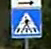

In [20]:
img = Image.open("DITS-full/DITS-full/DITS-detection/class/image//900.png")
img


In [21]:
transform = transforms.Compose([transforms.Resize(32),transforms.ToTensor()])
img_t = transform(img)

In [22]:
# Definisci le dimensioni di input previste dal tuo modello
input_height = 32
input_width = 32

mean = 0.6529
std = 0.3422

# Applica le trasformazioni alle dimensioni desiderate
preprocess = transforms.Compose([
    transforms.Resize((input_height, input_width)),
    transforms.ToTensor(),  # Converte l'immagine in un tensore PyTorch
    #transforms.Normalize(mean, std),
])

img_t = preprocess(img)  # Ora img_tensor è un tensore PyTorch valido

# Assicurati che img_tensor sia 4D (batch_size, canali, altezza, larghezza)
img_t = img_t.unsqueeze(0)  # Aggiunge una dimensione di batch

# Seleziona solo i primi 3 canali (RGB)
img_t = img_t[:, :3, :, :]

# Ora puoi passare img_tensor al modello
output = model(img_t).detach().numpy().argmax()

In [23]:
print("MinialexnetV2",output)
if (output == 0):
    print("\n\nIl risultato della MiniAlexNetV2 è Indicatory")

elif (output == 1):
    print("\n\nIl risultato della MiniAlexNetV2 è Prohibitory")
    
elif (output == 2):
    print("\n\nIl risultato della MiniAlexNetV2 è Warning")
    
else:
    print("ERROR 404 NOT FOUND")

MinialexnetV2 0


Il risultato della MiniAlexNetV2 è Indicatory


In [ ]:


# Ora puoi passare img_tensor al modello
output1 = model1(img_t).detach().numpy().argmax()

# Ora puoi passare img_tensor al modello
output2 = model2(img_t).detach().numpy().argmax()

print("Minialexnet",output1)
print("LeNet",output2)

